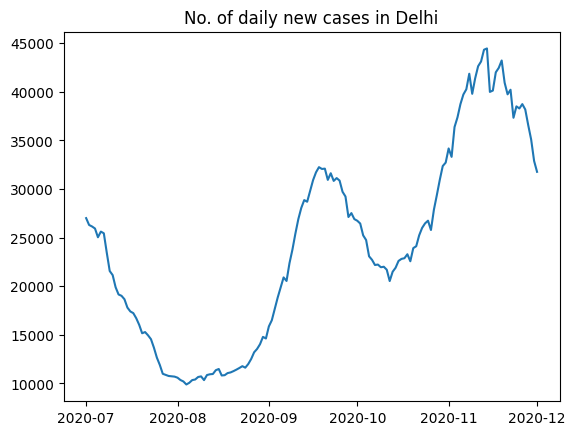

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (4,30,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


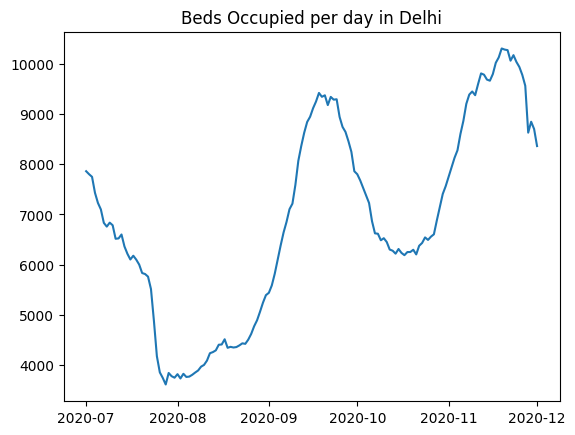

Correlation between daily new cases and hospitalizations: 0.96
Degree coresponding to Minimum Root Mean Percentage Error: 3


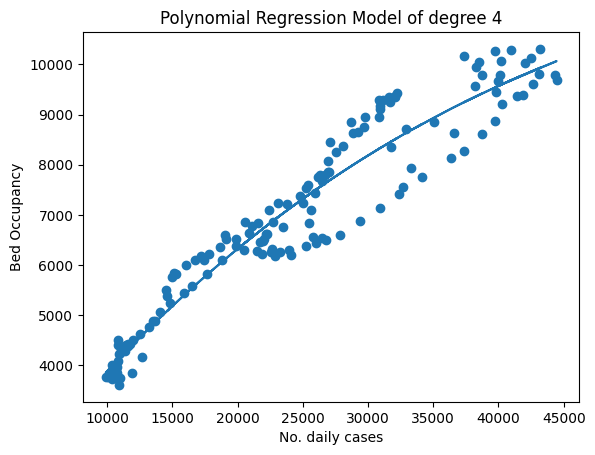

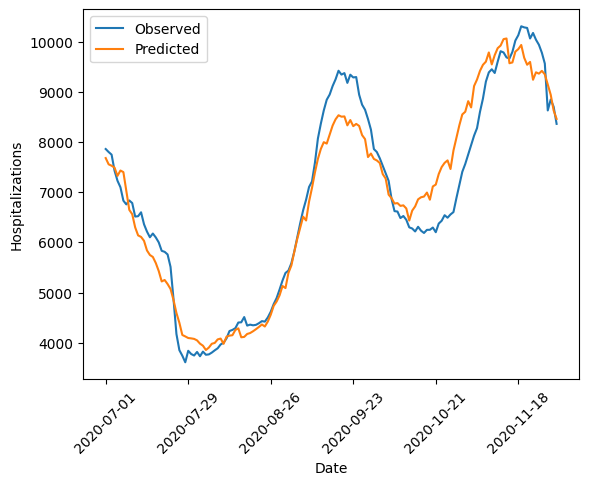

y = 770.00025094108332268661 + 0.00000000000000000000x^1 + 0.34878981794148006257x^2 + -0.00000389705915544517x^3 + 0.00000000001696964791x^4
Minimum Mean Percentage Error: 22.11689688974009
Minimum Root Mean squared Error: 525.1076658965411


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

start_date = pd.to_datetime('2020-07-01')
end_date = pd.to_datetime('2020-12-01')

# Load data
cases = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\states.csv")
cases = cases.loc[cases["State"] == "Delhi"]
cases["Date"] = pd.to_datetime(cases["Date"], format="%Y-%m-%d")
cases.set_index("Date", inplace=True)
cases = cases["Confirmed"]-cases["Recovered"]-cases["Deceased"]
cases_train = cases.loc[start_date:end_date]
plt.plot(cases_train.index, cases_train)
plt.title('No. of daily new cases in Delhi')
plt.show()

hospitalized = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\statewise_tested_numbers_data.csv - statewise_tested_numbers_data.csv.csv")
hospitalized = hospitalized[hospitalized.State == "Delhi"]
hospitalized.index = pd.to_datetime(hospitalized["Updated On"], format="%d/%m/%Y")
hospitalized.fillna(hospitalized["Beds_Occupied"].median(), inplace=True)
hospitalized = hospitalized["Beds_Occupied"]
hospitalized_train = hospitalized.loc['2020-07-01':'2020-12-01']
plt.plot(hospitalized_train.index, hospitalized_train)
plt.title('Beds Occupied per day in Delhi')
plt.show()

# correlation
correlation = cases_train.corr(hospitalized_train)
print(f"Correlation between daily new cases and hospitalizations: {correlation:.2f}")

error=[]
for i in range(int(10)):
    X = np.array(cases_train).reshape(-1, 1)
    y = np.array(hospitalized_train).reshape(-1, 1)
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    reg = LinearRegression().fit(X_poly, y)

    # Make predictions
    end_date = pd.to_datetime('2020-12-01')
    cases_test = cases.loc[start_date:end_date]
    hospitalized_test = hospitalized.loc[start_date:end_date]
    X_test = np.array(cases_test).reshape(-1, 1)
    X_poly_test = poly.transform(X_test)
    y_pred = reg.predict(X_poly_test)

    mse = mean_squared_error(hospitalized_train, y_pred)
    
    error.append(np.sqrt(mse))


for i in range(10):
    if error[i] == min(error):
        print("Degree coresponding to Minimum Root Mean Percentage Error:", i)
    else:
        continue

X = np.array(cases_train).reshape(-1, 1)
y = np.array(hospitalized_train).reshape(-1, 1)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
reg = LinearRegression().fit(X_poly, y)

# Make predictions
end_date = pd.to_datetime('2020-12-01')
cases_test = cases.loc[start_date:end_date]
hospitalized_test = hospitalized.loc[start_date:end_date]
X_test = np.array(cases_test).reshape(-1, 1)
X_poly_test = poly.transform(X_test)
y_pred = reg.predict(X_poly_test)

plt.scatter(cases_train, hospitalized_train, label = 'Observed')
plt.plot(X, y_pred, label='Predicted')
plt.xlabel('No. daily cases')
plt.ylabel('Bed Occupancy')
plt.title('Polynomial Regression Model of degree 4')
plt.show()

# Plot the results
plt.plot(hospitalized_test.index, hospitalized_test, label='Observed')
plt.plot(hospitalized_test.index, y_pred, label='Predicted')
plt.xticks(hospitalized_test.index[::28], rotation=45)
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.legend()
plt.show()

# Create equation string
intercept = reg.intercept_.item()
coefficients = reg.coef_.flatten()
powers = np.arange(1, len(coefficients)+1)
terms = [f"{c:.20f}x^{p}" for c, p in zip(coefficients, powers)]
equation = f"y = {intercept:.20f} + {' + '.join(terms)}"
print(equation)

n = len(hospitalized_test)
mpe = (1/n) * np.sum(np.abs(hospitalized_test[1] - y_pred)/hospitalized_test[1]) * 100
print("Minimum Mean Percentage Error:", mpe)

mse = mean_squared_error(hospitalized_train, y_pred)
print("Minimum Root Mean squared Error:", np.sqrt(mse))

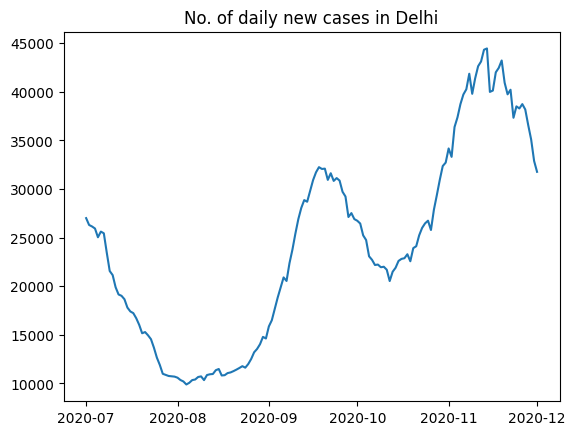

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (4,30,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


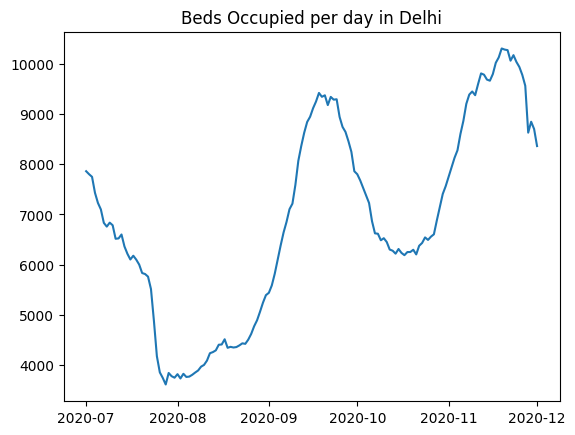

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Correlation between daily new cases and hospitalizations: 0.96


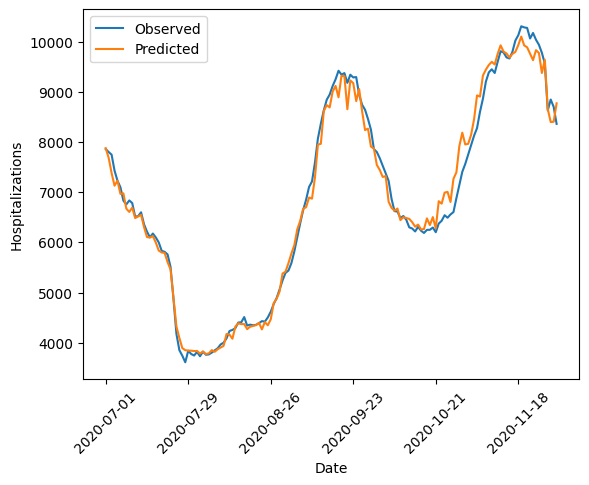

Minimum Root Mean squared Error: 237.25417488492104


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

start_date = pd.to_datetime('2020-07-01')
end_date = pd.to_datetime('2020-12-01')

# Load data
cases = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\states.csv")
cases = cases.loc[cases["State"] == "Delhi"]
cases["Date"] = pd.to_datetime(cases["Date"], format="%Y-%m-%d")
cases.set_index("Date", inplace=True)
cases = cases["Confirmed"]-cases["Recovered"]-cases["Deceased"]
cases_train = cases.loc[start_date:end_date]
plt.plot(cases_train.index, cases_train)
plt.title('No. of daily new cases in Delhi')
plt.show()

hospitalized = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\statewise_tested_numbers_data.csv - statewise_tested_numbers_data.csv.csv")
hospitalized = hospitalized[hospitalized.State == "Delhi"]
hospitalized.index = pd.to_datetime(hospitalized["Updated On"], format="%d/%m/%Y")
hospitalized.fillna(hospitalized["Beds_Occupied"].median(), inplace=True)
hospitalized = hospitalized["Beds_Occupied"]
hospitalized_train = hospitalized.loc['2020-07-01':'2020-12-01']
plt.plot(hospitalized_train.index, hospitalized_train)
plt.title('Beds Occupied per day in Delhi')
plt.show()

# correlation
correlation = cases_train.corr(hospitalized_train)
print(f"Correlation between daily new cases and hospitalizations: {correlation:.2f}")

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(np.array(cases_train).reshape(-1, 1), np.array(hospitalized_train).reshape(-1, 1))

# Make predictions
end_date = pd.to_datetime('2020-12-01')
cases_test = cases.loc[start_date:end_date]
hospitalized_test = hospitalized.loc[start_date:end_date]
y_pred = rf.predict(np.array(cases_test).reshape(-1, 1))

# Plot the results
plt.plot(hospitalized_test.index, hospitalized_test, label='Observed')
plt.plot(hospitalized_test.index, y_pred, label='Predicted')
plt.xticks(hospitalized_test.index[::28], rotation=45)
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.legend()
plt.show()

mse = mean_squared_error(hospitalized_test, y_pred)
print("Minimum Root Mean squared Error:", np.sqrt(mse))


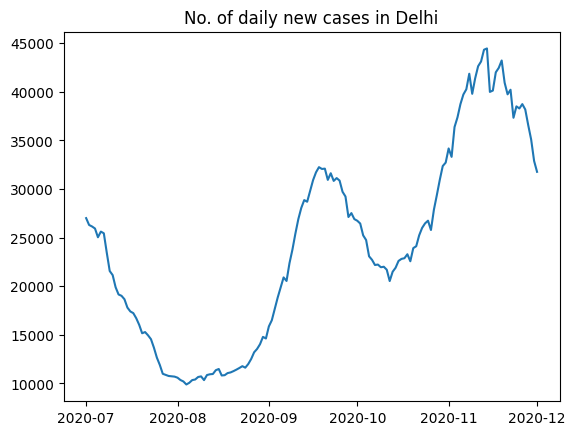

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (4,30,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


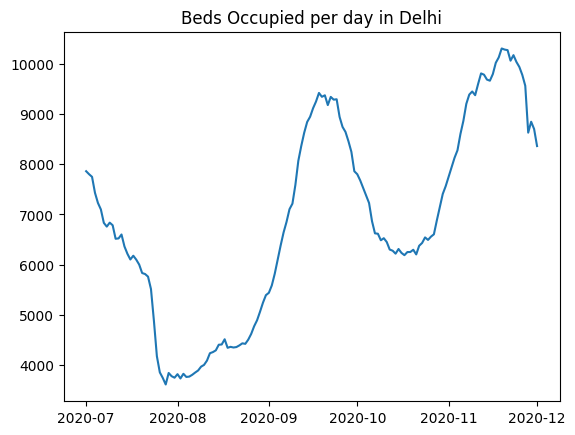

Correlation between daily new cases and hospitalizations: 0.96


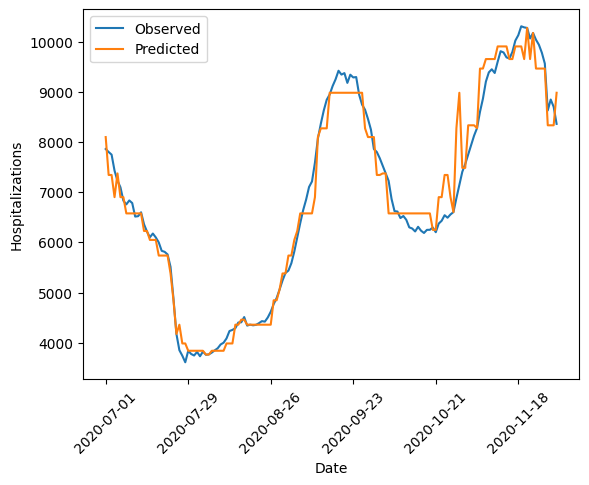

Root Mean Squared Error: 348.60927991320517


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

start_date = pd.to_datetime('2020-07-01')
end_date = pd.to_datetime('2020-12-01')

# Load data
cases = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\states.csv")
cases = cases.loc[cases["State"] == "Delhi"]
cases["Date"] = pd.to_datetime(cases["Date"], format="%Y-%m-%d")
cases.set_index("Date", inplace=True)
cases = cases["Confirmed"]-cases["Recovered"]-cases["Deceased"]
cases_train = cases.loc[start_date:end_date]
plt.plot(cases_train.index, cases_train)
plt.title('No. of daily new cases in Delhi')
plt.show()

hospitalized = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\statewise_tested_numbers_data.csv - statewise_tested_numbers_data.csv.csv")
hospitalized = hospitalized[hospitalized.State == "Delhi"]
hospitalized.index = pd.to_datetime(hospitalized["Updated On"], format="%d/%m/%Y")
hospitalized.fillna(hospitalized["Beds_Occupied"].median(), inplace=True)
hospitalized = hospitalized["Beds_Occupied"]
hospitalized_train = hospitalized.loc['2020-07-01':'2020-12-01']
plt.plot(hospitalized_train.index, hospitalized_train)
plt.title('Beds Occupied per day in Delhi')
plt.show()

# correlation
correlation = cases_train.corr(hospitalized_train)
print(f"Correlation between daily new cases and hospitalizations: {correlation:.2f}")

# Train Decision Tree Regression model
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
X_train = np.array(cases_train).reshape(-1, 1)
y_train = np.array(hospitalized_train).reshape(-1, 1)
regressor.fit(X_train, y_train)

# Make predictions
X_test = np.array(cases.loc[start_date:end_date]).reshape(-1, 1)
y_pred = regressor.predict(X_test)

# Plot the results
plt.plot(hospitalized_train.index, hospitalized_train, label='Observed')
plt.plot(pd.date_range(start=start_date, end=end_date), y_pred, label='Predicted')
plt.xticks(hospitalized_train.index[::28], rotation=45)
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.legend()
plt.show()

# Calculate errors
mse = mean_squared_error(hospitalized_train, regressor.predict(X_train))
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

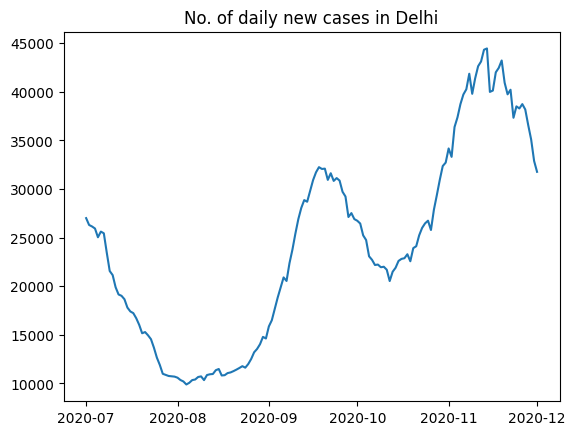

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (4,30,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


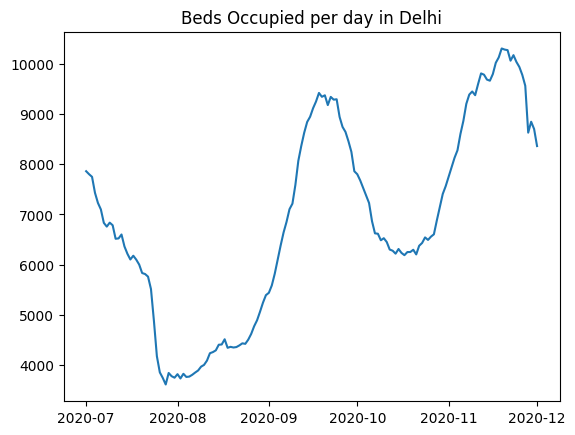

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


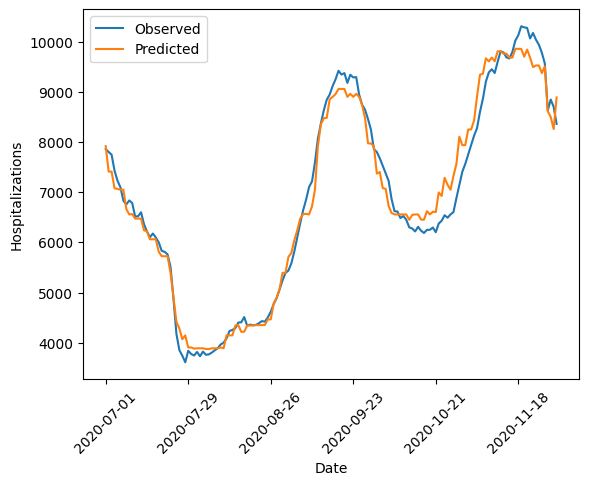

Root Mean Squared Error: 311.6100870010032


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


start_date = pd.to_datetime('2020-07-01')
end_date = pd.to_datetime('2020-12-01')

# Load data
cases = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\states.csv")
cases = cases.loc[cases["State"] == "Delhi"]
cases["Date"] = pd.to_datetime(cases["Date"], format="%Y-%m-%d")
cases.set_index("Date", inplace=True)
cases = cases["Confirmed"]-cases["Recovered"]-cases["Deceased"]
cases_train = cases.loc[start_date:end_date]
plt.plot(cases_train.index, cases_train)
plt.title('No. of daily new cases in Delhi')
plt.show()

hospitalized = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\statewise_tested_numbers_data.csv - statewise_tested_numbers_data.csv.csv")
hospitalized = hospitalized[hospitalized.State == "Delhi"]
hospitalized.index = pd.to_datetime(hospitalized["Updated On"], format="%d/%m/%Y")
hospitalized.fillna(hospitalized["Beds_Occupied"].median(), inplace=True)
hospitalized = hospitalized["Beds_Occupied"]
hospitalized_train = hospitalized.loc['2020-07-01':'2020-12-01']
plt.plot(hospitalized_train.index, hospitalized_train)
plt.title('Beds Occupied per day in Delhi')
plt.show()

# Normalize data
scaler_cases = StandardScaler()
scaler_hospitalized = StandardScaler()
cases_train_norm = scaler_cases.fit_transform(cases_train.values.reshape(-1, 1))
hospitalized_train_norm = scaler_hospitalized.fit_transform(hospitalized_train.values.reshape(-1, 1))

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
gb = GradientBoostingRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_gb = grid_search.best_estimator_

# Predict on test data
y_pred = best_gb.predict(X_test)

# Plot the results
plt.plot(hospitalized_test.index, hospitalized_test, label='Observed')
plt.plot(hospitalized_test.index, y_pred, label='Predicted')
plt.xticks(hospitalized_test.index[::28], rotation=45)
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(hospitalized_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

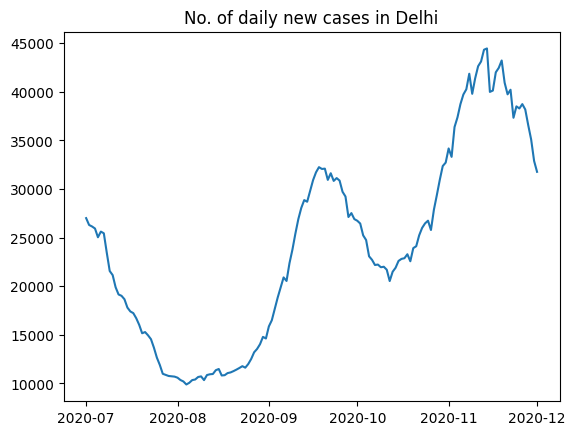

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (4,30,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


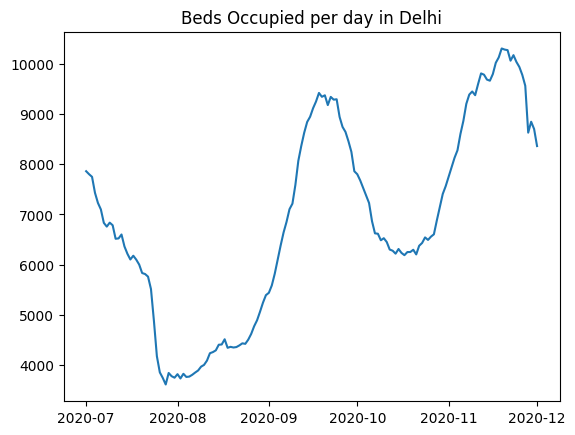

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


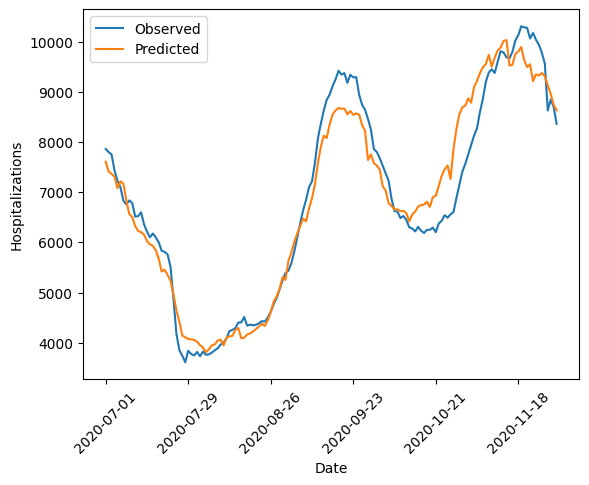

Root Mean Squared Error: 487.0136061698506


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

start_date = pd.to_datetime('2020-07-01')
end_date = pd.to_datetime('2020-12-01')

# Load data
cases = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\states.csv")
cases = cases.loc[cases["State"] == "Delhi"]
cases["Date"] = pd.to_datetime(cases["Date"], format="%Y-%m-%d")
cases.set_index("Date", inplace=True)
cases = cases["Confirmed"]-cases["Recovered"]-cases["Deceased"]
cases_train = cases.loc[start_date:end_date]
plt.plot(cases_train.index, cases_train)
plt.title('No. of daily new cases in Delhi')
plt.show()

hospitalized = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\statewise_tested_numbers_data.csv - statewise_tested_numbers_data.csv.csv")
hospitalized = hospitalized[hospitalized.State == "Delhi"]
hospitalized.index = pd.to_datetime(hospitalized["Updated On"], format="%d/%m/%Y")
hospitalized.fillna(hospitalized["Beds_Occupied"].median(), inplace=True)
hospitalized = hospitalized["Beds_Occupied"]
hospitalized_train = hospitalized.loc['2020-07-01':'2020-12-01']
plt.plot(hospitalized_train.index, hospitalized_train)
plt.title('Beds Occupied per day in Delhi')
plt.show()

# Normalize data
scaler_cases = StandardScaler()
scaler_hospitalized = StandardScaler()
cases_train_norm = scaler_cases.fit_transform(cases_train.values.reshape(-1, 1))
hospitalized_train_norm = scaler_hospitalized.fit_transform(hospitalized_train.values.reshape(-1, 1))

# Train the model
model = MLPRegressor(hidden_layer_sizes=(1000, 400), activation='relu', solver='adam', max_iter=1000, random_state=1)
model.fit(cases_train_norm, hospitalized_train_norm)

# Make predictions
end_date = pd.to_datetime('2020-12-01')
cases_test = cases.loc[start_date:end_date]
hospitalized_test = hospitalized.loc[start_date:end_date]
cases_test_norm = scaler_cases.transform(cases_test.values.reshape(-1, 1))
y_pred_norm = model.predict(cases_test_norm)
y_pred_norm_2d = y_pred_norm.reshape(-1, 1)
y_pred = scaler_hospitalized.inverse_transform(y_pred_norm_2d)

# Plot the results
plt.plot(hospitalized_test.index, hospitalized_test, label='Observed')
plt.plot(hospitalized_test.index, y_pred, label='Predicted')
plt.xticks(hospitalized_test.index[::28], rotation=45)
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(hospitalized_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)